# Assignment 1

Goal:

Using the Internet Service Offers Dataset I would want to predict what internet pricing I would revice depeding on what deal I buy and from where.

In [148]:
from data_cleaning import rows_to_remove
from data_cleaning import print_missing
import pandas as pd

In [149]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "speed_price_att.csv"  # Replace 'your_file_path.csv' with the actual path to your CSV file
#file_path = "team_stats_2003_2023.csv"
df = pd.read_csv(file_path)
# Get the number of rows and columns in the DataFrame
num_rows = df.shape[0]
num_cols = df.shape[1]

print("\nNumber of rows:", num_rows)
print("Number of columns:", num_cols)


Number of rows: 432303
Number of columns: 26


In [150]:
df[df.duplicated('address_full')] # so no duplicate values

,address_full,incorporated_place,major_city,state,lat,lon,block_group,collection_datetime,provider,speed_down,speed_up,speed_unit,price,technology,package,fastest_speed_down,fastest_speed_price,fn,redlining_grade,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income


In [151]:
# Assuming 'df' is your DataFrame
column_names = df.columns

# If you want to convert it to a list, you can do:
column_names_list = list(df.columns)

# Printing the column names
print(column_names)
print(len(column_names_list))

Index(['address_full', 'incorporated_place', 'major_city', 'state', 'lat',
       'lon', 'block_group', 'collection_datetime', 'provider', 'speed_down',
       'speed_up', 'speed_unit', 'price', 'technology', 'package',
       'fastest_speed_down', 'fastest_speed_price', 'fn', 'redlining_grade',
       'race_perc_non_white', 'income_lmi', 'ppl_per_sq_mile', 'n_providers',
       'income_dollars_below_median', 'internet_perc_broadband',
       'median_household_income'],
      dtype='object')
26


In [152]:
pd.set_option('display.max_columns', None)
df.sample(5)

,address_full,incorporated_place,major_city,state,lat,lon,block_group,collection_datetime,provider,speed_down,speed_up,speed_unit,price,technology,package,fastest_speed_down,fastest_speed_price,fn,redlining_grade,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income
226689,"16801 Wyoming St, Detroit MI 48221",Detroit city,detroit,MI,42.414660,-83.160534,261635362002,1650277792,AT&T,10.0,1.0,Mbps,55.0,Not Fiber,Internet 10,10.0,55.0,../data/intermediary/isp/att/detroit/261635362...,B,1.000000,1.393747,3600.087751,2.0,-12796.0,0.744755,45294
42975,"8212 W 3rd St, Los Angeles CA 90048",Los Angeles city,los angeles,CA,34.072340,-118.368430,60372146003,1650281661,AT&T,100.0,20.0,Mbps,55.0,Not Fiber,Internet 100,100.0,55.0,../data/intermediary/isp/att/los angeles/06037...,C,0.352875,1.852320,3909.435093,2.0,-55648.0,0.941860,120938
194343,"6427 E Jacqueline St, Wichita KS 67206",Wichita city,wichita,KS,37.699921,-97.261088,201730076003,1650304554,AT&T,300.0,300.0,Mbps,55.0,Fiber,AT&T FIBER—INTERNET 300,5000.0,180.0,../data/intermediary/isp/att/wichita/201730076...,NaN,0.018967,1.344815,765.527544,3.0,-18429.0,0.813043,71875
388145,"9609 Pine Lake Dr, Houston TX 77055",Houston city,houston,TX,29.789993,-95.526414,482015223011,1650273635,AT&T,300.0,300.0,Mbps,55.0,Fiber,AT&T FIBER—INTERNET 300,1000.0,80.0,../data/intermediary/isp/att/houston/482015223...,NaN,0.504401,1.158750,2303.723391,2.0,-8509.0,0.856427,62109
227179,"558 S Harrington St, Detroit MI 48209",Detroit city,detroit,MI,42.297518,-83.108622,261635250003,1650272480,AT&T,18.0,1.0,Mbps,55.0,Not Fiber,Internet 18,18.0,55.0,../data/intermediary/isp/att/detroit/261635250...,D,0.714932,NaN,202.980600,2.0,NaN,0.528736,-666666666


## Initial Observatios

- `address_full` is practically an ID and most likely has no usefull information so its most likely best to discard it
incorporated_place mostlikely has the same information as major_city, incorporated place needs to be disgarded if this is true

- `lat` and `lon` mostlikely can be disgaded however, if we can transform these values to a smaller range similar to other numeric attributes it could probably be used

- `block_group` can be disgarded if there isn't a way to bucket the values together so I dont need to make too many asymetric binary variables

- `collection_datetime` would need to be transoformed into at least 2 attributes one for the year and the other for the month. but this was soon found out to be the date at which the information was recived making it unrelated to the rest of the data. 

- `provider` will always be AT&T this coloumn can be deleted

- `fn` is some usless data about the api used to get the data, this would also be deleted

## Missing Values
Apparently there's a lot of missing values. Here are some thoughts on how to handle them:

- `speed_down`, `speed_up`, `speed_unit`, `price`, `technology`, `package`, `fastest_speed_down`, `fastest_speed_price`
all have the same number of missing rows. Meaning it might be best to completely delete the rows that have these values missing.

- `redlining_grade` is missing 246027 values which is quite significant since it is half our dataset. It would make sense here to completely delete this column


- `income_lmi`, `income_dollars_below_median`, are both transformations of the attribute `median_household_income`. The transformations are based on data based on the city, if we chose to keep the attribute for `major_city` then it might not make sense to keep these values, we might need to check if this data follows the same data.

In [153]:
print_missing(df,column_names_list)

Column 'speed_down' has 0. - 82600
Column 'speed_up' has 0. - 82600
Column 'speed_unit' has NaN. - 82600
Column 'price' has 0 and NaN. - 82603
Column 'technology' has NaN. - 82600
Column 'package' has NaN. - 82600
Column 'fastest_speed_down' has 0. - 82600
Column 'fastest_speed_price' has 0. - 82600
Column 'redlining_grade' has NaN. - 246027
Column 'race_perc_non_white' has 0. - 1600
Column 'income_lmi' has NaN. - 17661
Column 'ppl_per_sq_mile' has 0 and NaN. - 8560
Column 'n_providers' has NaN. - 7969
Column 'income_dollars_below_median' has 0 and NaN. - 17693
Column 'internet_perc_broadband' has 0 and NaN. - 931


Confirms that the missing values in these columns are all occuring at the same time

## Quick Cleaning

In [154]:
speed_columns = ['speed_down', 'speed_up', 'speed_unit','price','technology','package','fastest_speed_down','fastest_speed_price']
rows = rows_to_remove(df,speed_columns)
print(len(rows))
df_new = df.drop(rows)

82603


In [155]:
columns_to_clean = ['race_perc_non_white','income_lmi','internet_perc_broadband','income_dollars_below_median','n_providers','ppl_per_sq_mile']
rows = rows_to_remove(df_new,columns_to_clean,missing_type='nan')
print(len(rows))
df_new = df_new.drop(rows)

19191


In [156]:
len(df_new)

330509

In [157]:
columns_to_remove  = ['fn','redlining_grade','block_group']
df_new = df_new.drop(columns=columns_to_remove)

In [158]:
# If you want to convert it to a list, you can do:
temp = list(df_new.columns)
print_missing(df_new,temp, missing_type='both')

Column 'race_perc_non_white' has 0. - 624
Column 'income_dollars_below_median' has 0. - 31
Column 'internet_perc_broadband' has 0. - 5


In [159]:
df_new['date'] = pd.to_datetime(df_new['collection_datetime'], unit='s')

In [160]:
# Extract year and month into separate columns
df_new['year'] = df_new['date'].dt.year
df_new['month'] = df_new['date'].dt.month

# Drop the original timestamp column and the intermediary 'date' column if needed
df_new.drop(['collection_datetime', 'date'], axis=1, inplace=True)
print(df_new['year'].unique())
print(df_new['month'].unique())
df_new.drop(['year', 'month'], axis=1, inplace=True)

[2022]
[4 9]


In [161]:
df_new.head()

,address_full,incorporated_place,major_city,state,lat,lon,provider,speed_down,speed_up,speed_unit,price,technology,package,fastest_speed_down,fastest_speed_price,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income
0,"2406 Country Club Ave NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.745179,-86.606806,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,0.475059,0.381744,512.090069,4.0,35091.0,0.527881,21667
1,"1902 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.747563,-86.607140,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,0.475059,0.381744,512.090069,4.0,35091.0,0.527881,21667
2,"2312 Cardinal Ave NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.746504,-86.605884,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,0.475059,0.381744,512.090069,4.0,35091.0,0.527881,21667
3,"1903 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.747759,-86.607675,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,0.475059,0.381744,512.090069,4.0,35091.0,0.527881,21667
4,"1905 Canterbury Cir NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.748585,-86.605223,AT&T,300.000,300.000,Mbps,55.0,Fiber,AT&T FIBER—INTERNET 300,5000.000,180.0,0.475059,0.381744,512.090069,4.0,35091.0,0.527881,21667


major city and incoporated place contain practically the same values

In [162]:
from data_cleaning import plot_heatmap

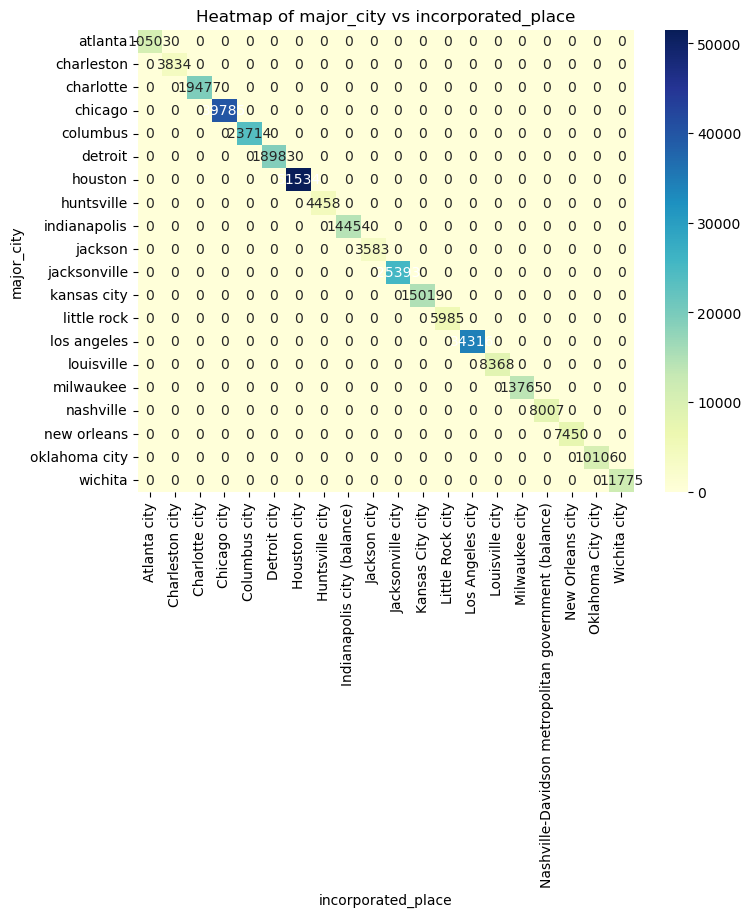

In [163]:
plot_heatmap(df_new,'major_city','incorporated_place')

In [164]:
print(df_new['major_city'].unique())
print(df_new['incorporated_place'].unique())

df_new.drop(['incorporated_place'], axis=1, inplace=True)
df_new.drop(['address_full'], axis=1, inplace=True)
df_new.drop(['speed_unit'], axis=1, inplace=True)
df_new.drop(['provider'], axis=1, inplace=True)

['huntsville' 'little rock' 'los angeles' 'jacksonville' 'atlanta'
 'chicago' 'indianapolis' 'wichita' 'louisville' 'new orleans' 'detroit'
 'kansas city' 'jackson' 'charlotte' 'columbus' 'oklahoma city'
 'charleston' 'nashville' 'houston' 'milwaukee']
['Huntsville city' 'Little Rock city' 'Los Angeles city'
 'Jacksonville city' 'Atlanta city' 'Chicago city'
 'Indianapolis city (balance)' 'Wichita city' 'Louisville city'
 'New Orleans city' 'Detroit city' 'Kansas City city' 'Jackson city'
 'Charlotte city' 'Columbus city' 'Oklahoma City city' 'Charleston city'
 'Nashville-Davidson metropolitan government (balance)' 'Houston city'
 'Milwaukee city']


In [165]:
print(df_new['technology'].unique())
print(df_new['package'].unique())

['Not Fiber' 'Fiber']
['Internet Basic 768kbps' 'Internet Basic 5' 'AT&T FIBER—INTERNET 300'
 'Internet 10' 'Internet 50' 'Internet 18' 'Internet 25' 'Internet 75'
 'Internet 100' 'Internet Basic 1.5' 'AT&T FIBER—INTERNET 100'
 'AT&T FIBER — INTERNET 300' 'Internet Basic 3'
 'AT&T FIBER — INTERNET 500']


In [166]:
#df_new.drop(['lat','lon'], axis=1, inplace=True)

In [167]:
df_new.sample(3)

,major_city,state,lat,lon,speed_down,speed_up,price,technology,package,fastest_speed_down,fastest_speed_price,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income
59060,los angeles,CA,34.054330,-118.278380,18.0,1.0,55.0,Not Fiber,Internet 18,18.0,55.0,0.875556,0.382907,30590.048038,3.0,40290.0,0.549689,25000
268326,jackson,MS,32.356572,-90.136861,25.0,5.0,55.0,Not Fiber,Internet 25,25.0,55.0,0.104216,2.283197,791.943222,4.0,-51410.0,0.953358,91474
119239,chicago,IL,41.695640,-87.539728,75.0,20.0,55.0,Not Fiber,Internet 75,75.0,55.0,0.872587,0.855017,3724.196638,3.0,9003.0,0.822622,53094


## Data Exploration

In [168]:
from data_cleaning import display_histogram
from data_cleaning import plot_continuous_variable
from data_cleaning import scatter_plot
from data_cleaning import plot_heatmap

In [169]:
len(df_new.columns)

18

### testing  `income_lmi`, `income_dollars_below_median` and `median_household_income`

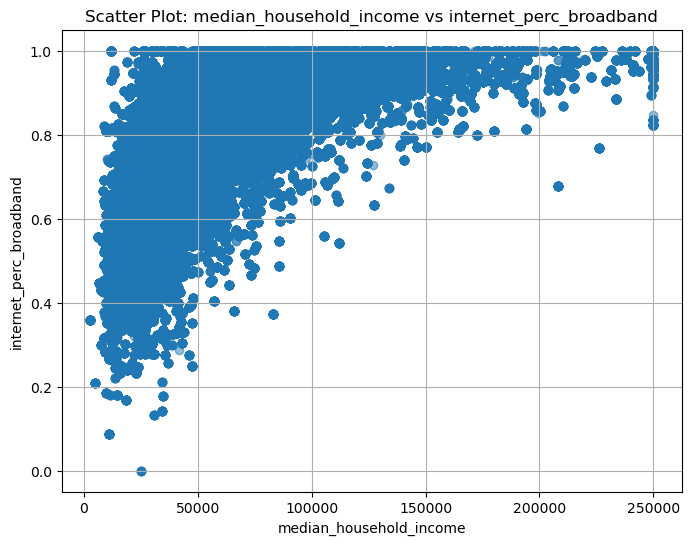

2499


In [170]:
scatter_plot(df_new, 'median_household_income', 'internet_perc_broadband')
print(df_new['median_household_income'].min())

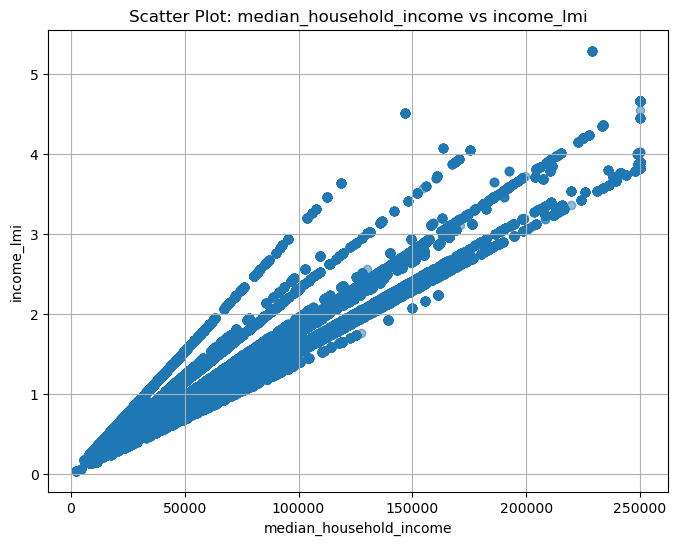

In [171]:
scatter_plot(df_new,'median_household_income', 'income_lmi')

In [172]:
import numpy as np
df_new['city_household_income'] = df_new['median_household_income'] // df_new['income_lmi']

In [173]:
def modify_pairs(df, column_name):
    unique_values = sorted(df[column_name].unique())
    
    for i in range(len(unique_values) - 1):
        if unique_values[i] + 1 == unique_values[i + 1]:
            df.loc[df[column_name] == unique_values[i], column_name] = unique_values[i + 1]

In [174]:
modify_pairs(df_new, 'city_household_income')

In [175]:
print(df_new['city_household_income'].unique(), len(df_new['city_household_income'].unique()))
print(df_new['major_city'].unique(), len(df_new['major_city'].unique()))



[56758. 53620. 65290. 55531. 64179. 62097. 50813. 53446. 54929. 43258.
 32498. 56179. 40064. 65359. 54902. 56456. 72071. 62087. 53600. 43125.] 20
['huntsville' 'little rock' 'los angeles' 'jacksonville' 'atlanta'
 'chicago' 'indianapolis' 'wichita' 'louisville' 'new orleans' 'detroit'
 'kansas city' 'jackson' 'charlotte' 'columbus' 'oklahoma city'
 'charleston' 'nashville' 'houston' 'milwaukee'] 20


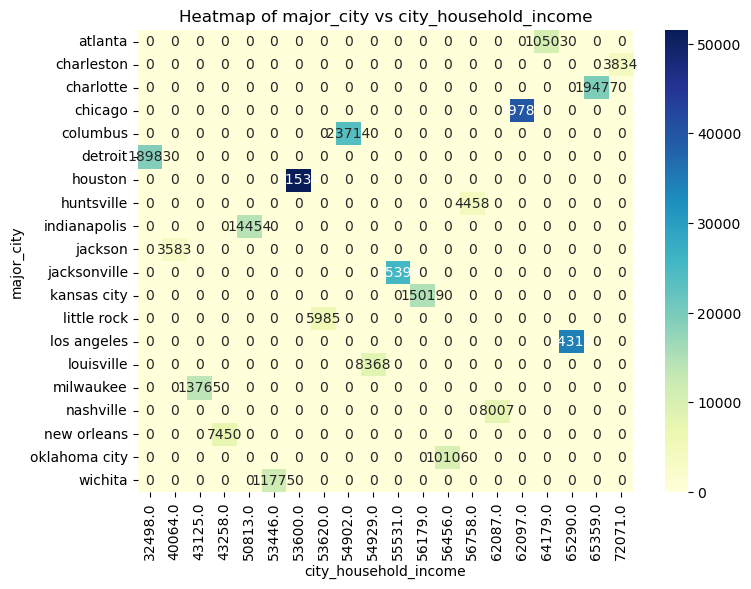

In [176]:
from data_cleaning import plot_heatmap
plot_heatmap(df_new, 'major_city', 'city_household_income')

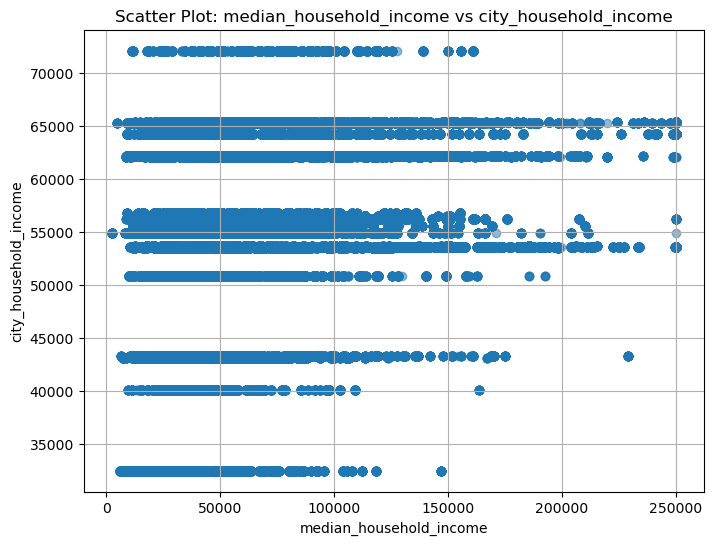

In [177]:
scatter_plot(df_new,'median_household_income', 'city_household_income')

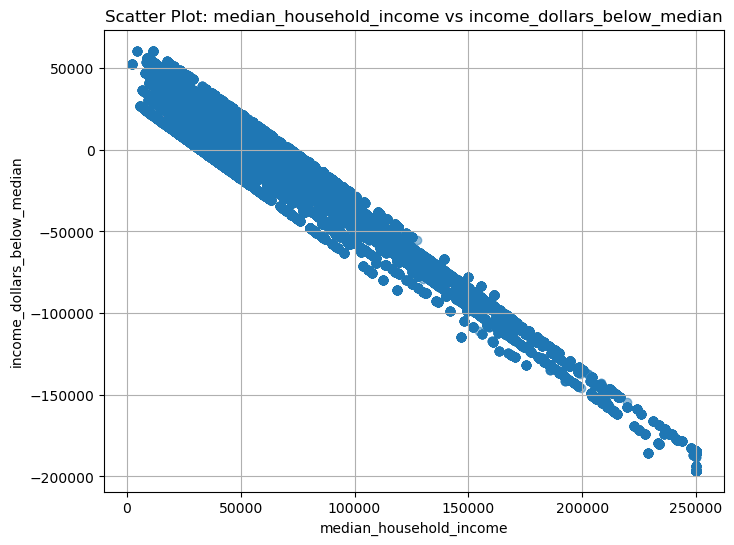

In [178]:
scatter_plot(df_new,'median_household_income', 'income_dollars_below_median')

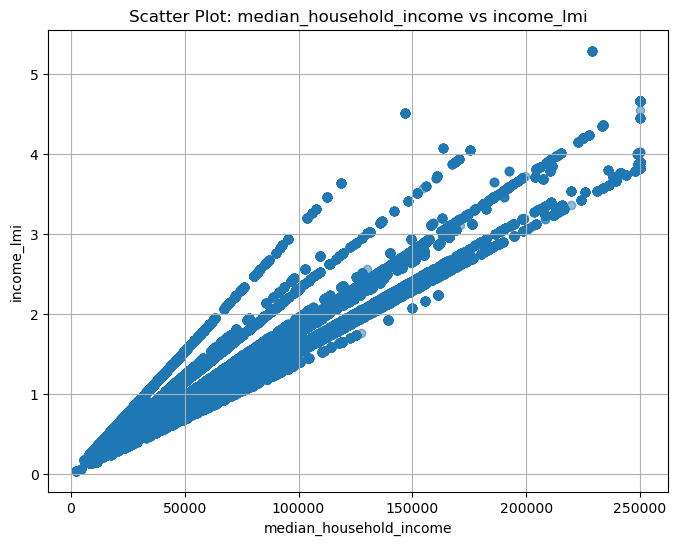

In [179]:
scatter_plot(df_new,'median_household_income', 'income_lmi')

In [180]:
df_new = df_new.drop('income_dollars_below_median',axis=1)
df_new = df_new.drop('income_lmi',axis=1)
#df_new = df_new.drop('major_city',axis=1)

In [181]:
df_new

,major_city,state,lat,lon,speed_down,speed_up,price,technology,package,fastest_speed_down,fastest_speed_price,race_perc_non_white,ppl_per_sq_mile,n_providers,internet_perc_broadband,median_household_income,city_household_income
0,huntsville,AL,34.745179,-86.606806,0.768,0.384,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,0.475059,512.090069,4.0,0.527881,21667,56758.0
1,huntsville,AL,34.747563,-86.607140,5.000,1.000,55.0,Not Fiber,Internet Basic 5,5.000,55.0,0.475059,512.090069,4.0,0.527881,21667,56758.0
2,huntsville,AL,34.746504,-86.605884,0.768,0.384,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,0.475059,512.090069,4.0,0.527881,21667,56758.0
3,huntsville,AL,34.747759,-86.607675,5.000,1.000,55.0,Not Fiber,Internet Basic 5,5.000,55.0,0.475059,512.090069,4.0,0.527881,21667,56758.0
4,huntsville,AL,34.748585,-86.605223,300.000,300.000,55.0,Fiber,AT&T FIBER—INTERNET 300,5000.000,180.0,0.475059,512.090069,4.0,0.527881,21667,56758.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432298,milwaukee,WI,43.028712,-88.014866,300.000,300.000,55.0,Fiber,AT&T FIBER—INTERNET 300,1000.000,80.0,0.145038,1163.711163,2.0,0.911591,66688,43125.0
432299,milwaukee,WI,43.030284,-88.013114,300.000,300.000,55.0,Fiber,AT&T FIBER—INTERNET 300,1000.000,80.0,0.145038,1163.711163,2.0,0.911591,66688,43125.0
432300,milwaukee,WI,43.030459,-88.008985,300.000,300.000,55.0,Fiber,AT&T FIBER—INTERNET 300,1000.000,80.0,0.145038,1163.711163,2.0,0.911591,66688,43125.0
432301,milwaukee,WI,43.032435,-88.013174,50.000,10.000,55.0,Not Fiber,Internet 50,50.000,55.0,0.145038,1163.711163,2.0,0.911591,66688,43125.0


### Prices and Packages

In [182]:
from data_cleaning import combine_categorical_columns

In [183]:
df_new1 = df_new

In [184]:
df_new1.head()

,major_city,state,lat,lon,speed_down,speed_up,price,technology,package,fastest_speed_down,fastest_speed_price,race_perc_non_white,ppl_per_sq_mile,n_providers,internet_perc_broadband,median_household_income,city_household_income
0,huntsville,AL,34.745179,-86.606806,0.768,0.384,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,0.475059,512.090069,4.0,0.527881,21667,56758.0
1,huntsville,AL,34.747563,-86.607140,5.000,1.000,55.0,Not Fiber,Internet Basic 5,5.000,55.0,0.475059,512.090069,4.0,0.527881,21667,56758.0
2,huntsville,AL,34.746504,-86.605884,0.768,0.384,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,0.475059,512.090069,4.0,0.527881,21667,56758.0
3,huntsville,AL,34.747759,-86.607675,5.000,1.000,55.0,Not Fiber,Internet Basic 5,5.000,55.0,0.475059,512.090069,4.0,0.527881,21667,56758.0
4,huntsville,AL,34.748585,-86.605223,300.000,300.000,55.0,Fiber,AT&T FIBER—INTERNET 300,5000.000,180.0,0.475059,512.090069,4.0,0.527881,21667,56758.0


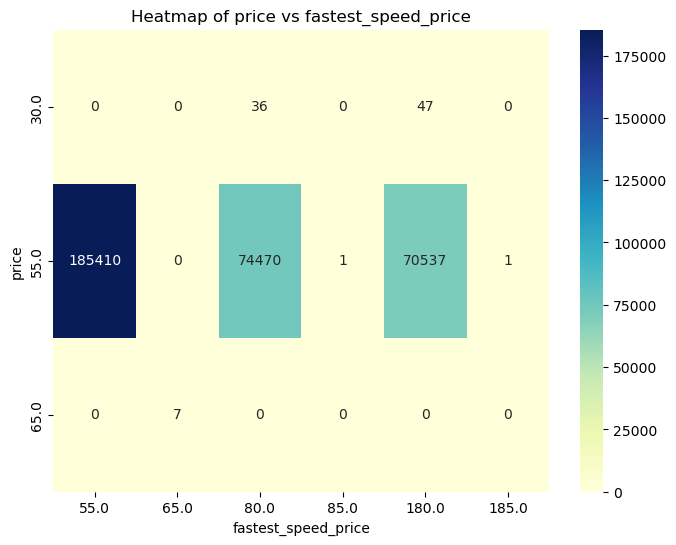

In [185]:
plot_heatmap(df_new,'price','fastest_speed_price')

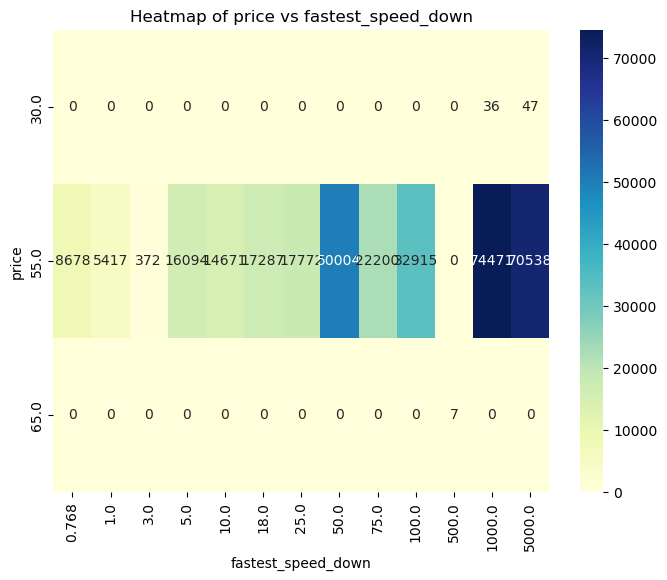

In [186]:
plot_heatmap(df_new,'price','fastest_speed_down')

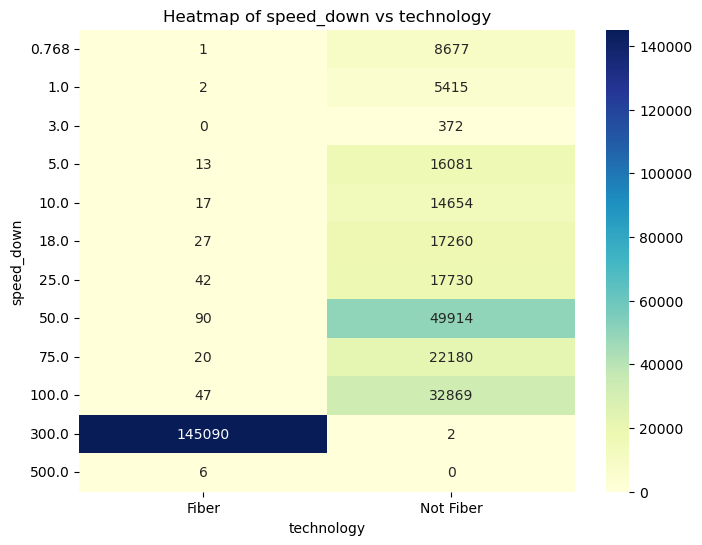

In [187]:
plot_heatmap(df_new,'speed_down','technology')

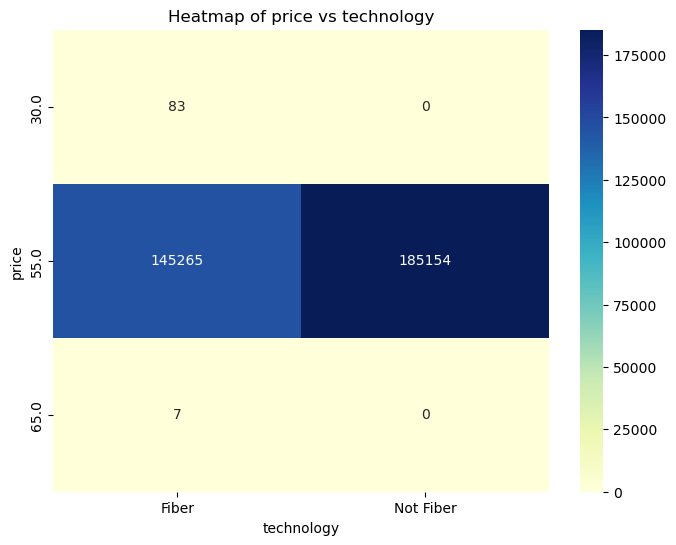

In [188]:
plot_heatmap(df_new,'price','technology')

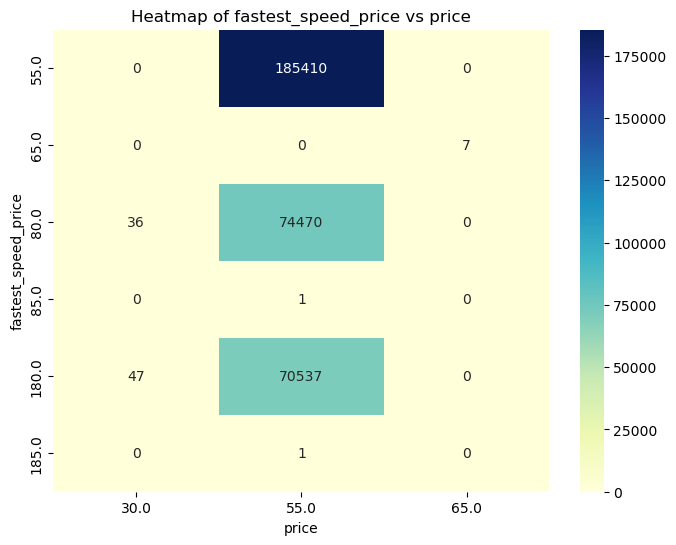

In [189]:
plot_heatmap(df_new,'fastest_speed_price','price')

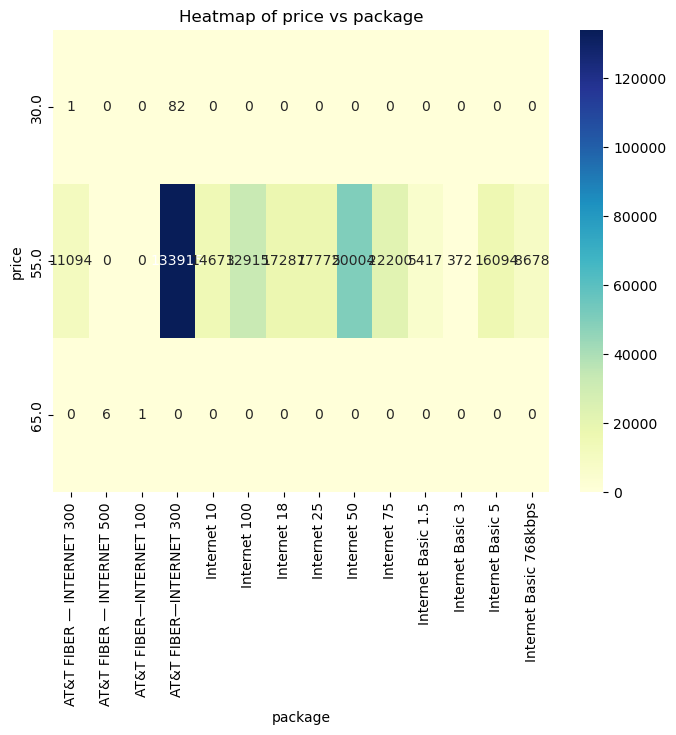

In [190]:
plot_heatmap(df_new,'price','package')

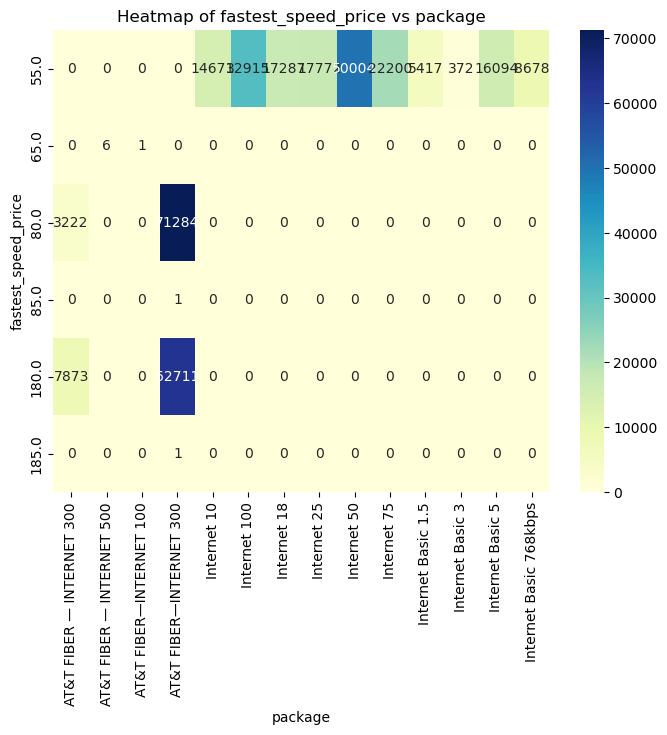

In [191]:
plot_heatmap(df_new,'fastest_speed_price','package')

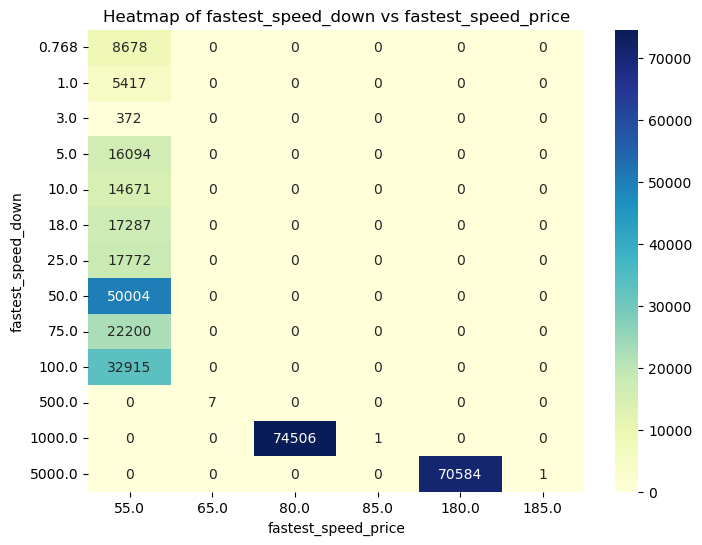

In [192]:
plot_heatmap(df_new,'fastest_speed_down','fastest_speed_price')

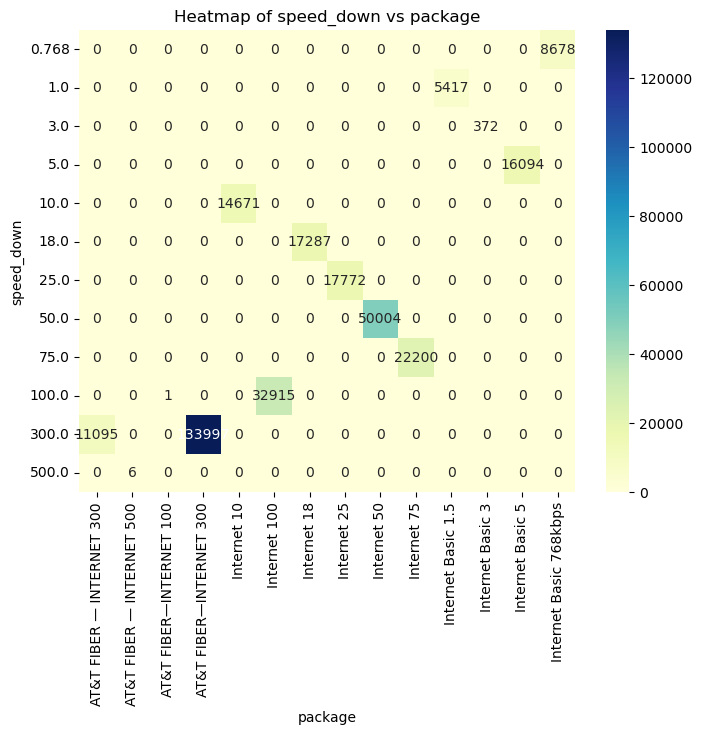

In [193]:
plot_heatmap(df_new,'speed_down','package')

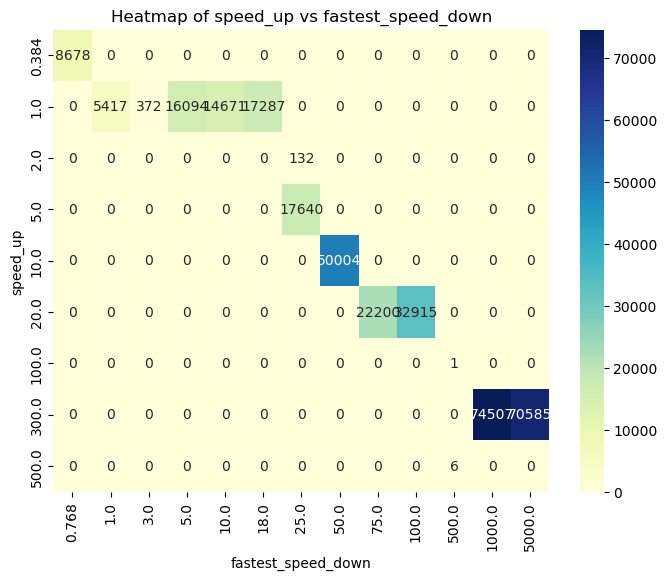

In [194]:
plot_heatmap(df_new,'speed_up','fastest_speed_down')

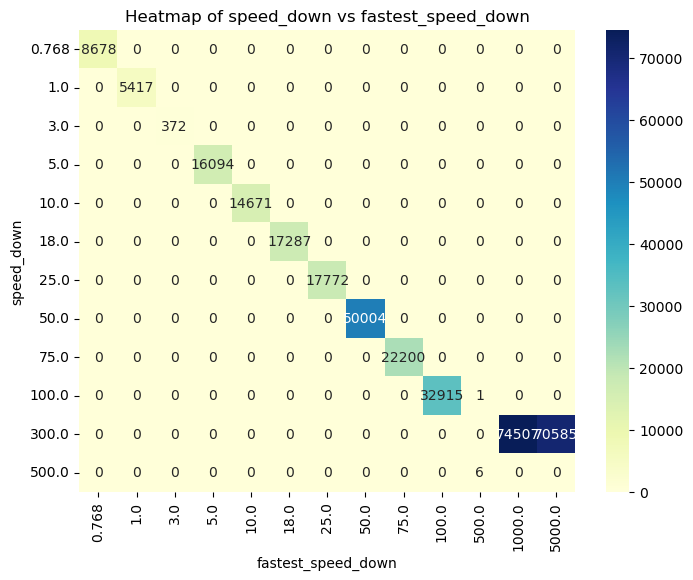

In [195]:
plot_heatmap(df_new,'speed_down','fastest_speed_down')

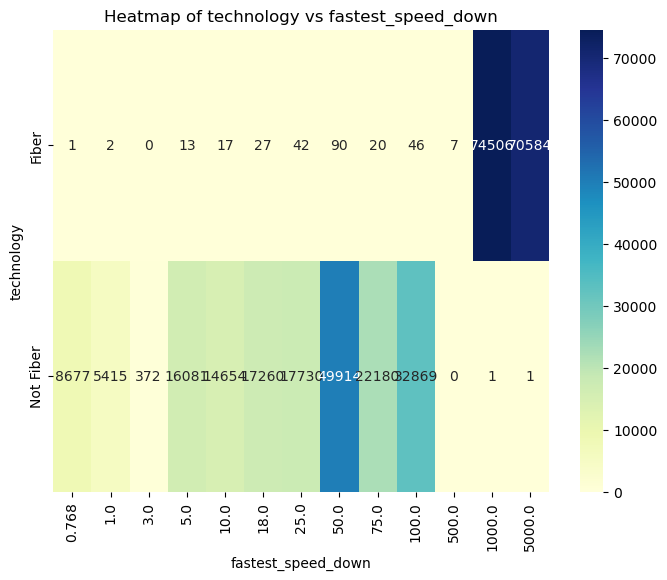

In [196]:
plot_heatmap(df_new,'technology','fastest_speed_down')

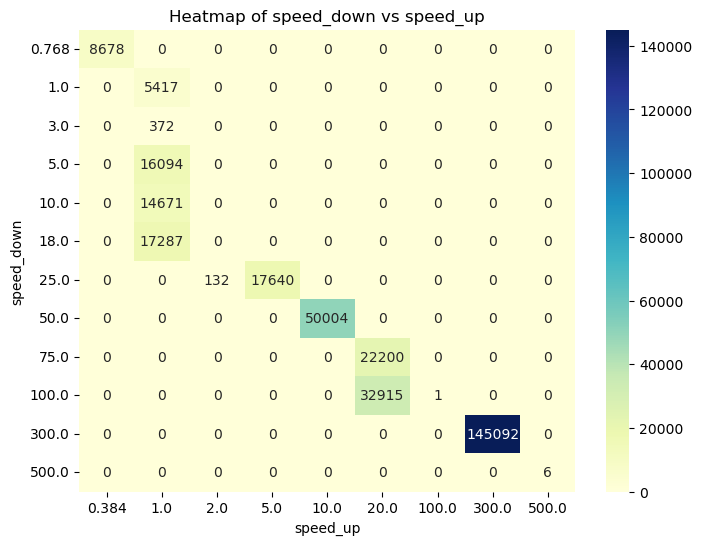

In [197]:
plot_heatmap(df_new,'speed_down','speed_up')

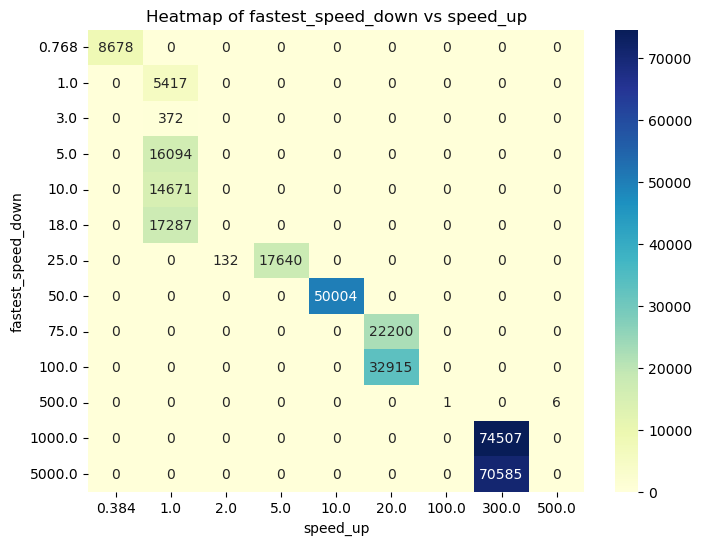

In [198]:
plot_heatmap(df_new,'fastest_speed_down','speed_up')

- package, speed_down, speed_up, fastest_speed_down are very correlated, which makes sense certian deals have certian speeds
- the minimum price is almost always 55


In [199]:
from data_cleaning import cramers_v

In [200]:
cramers_v(df_new['speed_up'],df_new['speed_down'])

0.8660175524047027

In [201]:
cramers_v(df_new['fastest_speed_down'],df_new['speed_down'])

0.9934823408786578

In [202]:
df_new = df_new1

In [203]:
df_new = df_new.drop('package',axis=1)

In [204]:
df_new2 = combine_categorical_columns(df_new,['speed_down','speed_up','price','fastest_speed_down','fastest_speed_price'],'deal')

In [205]:
df_new2['deal'].unique()

array(['0.768_0.384_55.0_0.768_55.0', '5.0_1.0_55.0_5.0_55.0',
       '300.0_300.0_55.0_5000.0_180.0', '10.0_1.0_55.0_10.0_55.0',
       '300.0_300.0_55.0_1000.0_80.0', '50.0_10.0_55.0_50.0_55.0',
       '18.0_1.0_55.0_18.0_55.0', '300.0_300.0_30.0_5000.0_180.0',
       '25.0_5.0_55.0_25.0_55.0', '75.0_20.0_55.0_75.0_55.0',
       '100.0_20.0_55.0_100.0_55.0', '1.0_1.0_55.0_1.0_55.0',
       '300.0_300.0_30.0_1000.0_80.0', '25.0_2.0_55.0_25.0_55.0',
       '100.0_100.0_65.0_500.0_65.0', '300.0_300.0_55.0_5000.0_185.0',
       '300.0_300.0_55.0_1000.0_85.0', '3.0_1.0_55.0_3.0_55.0',
       '500.0_500.0_65.0_500.0_65.0'], dtype=object)

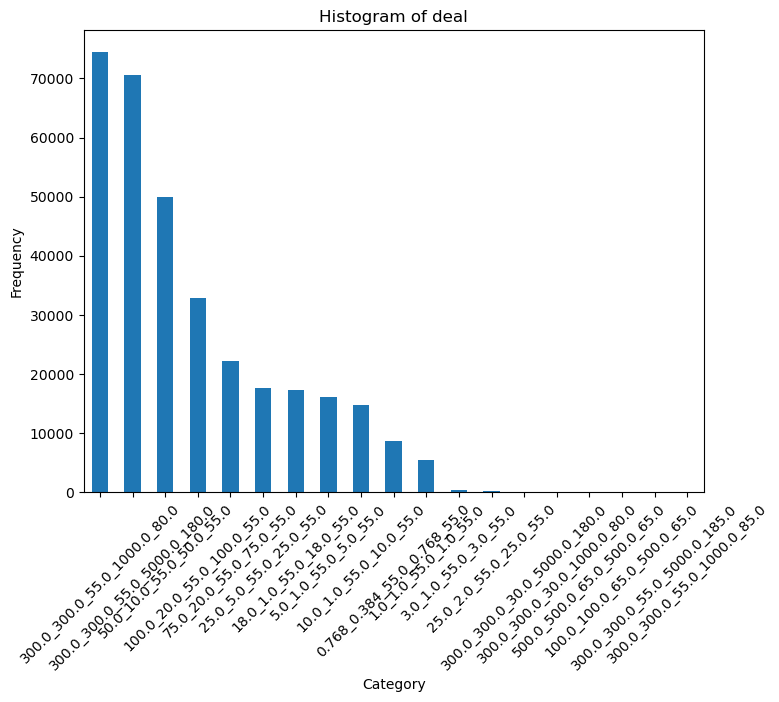

19

In [206]:
display_histogram(df_new2,'deal')
len(df_new2['deal'].unique())

In [207]:
# df_new = df_new.drop('speed_up',axis=1)
# df_new = df_new.drop('speed_down',axis=1)
# df_new = df_new.drop('price',axis=1)
# df_new = df_new.drop('fastest_speed_down',axis=1)
# df_new = df_new.drop('fastest_speed_price',axis=1)

In [208]:
df_new.sample()

,major_city,state,lat,lon,technology,race_perc_non_white,ppl_per_sq_mile,n_providers,internet_perc_broadband,median_household_income,city_household_income,deal
112506,chicago,IL,41.940572,-87.700549,Fiber,0.407459,2917.396184,2.0,0.811355,115556,62097.0,300.0_300.0_55.0_1000.0_80.0


In [209]:
df_new.sample(5)

,major_city,state,lat,lon,technology,race_perc_non_white,ppl_per_sq_mile,n_providers,internet_perc_broadband,median_household_income,city_household_income,deal
380044,houston,TX,29.658274,-95.464375,Not Fiber,0.852201,1050.531212,2.0,0.591216,35798,53600.0,100.0_20.0_55.0_100.0_55.0
368799,houston,TX,29.772500,-95.372692,Fiber,0.544803,2293.747688,2.0,0.919847,136000,53600.0,300.0_300.0_55.0_1000.0_80.0
403437,houston,TX,29.706655,-95.345948,Fiber,0.812804,1452.868886,3.0,0.869091,66302,53600.0,300.0_300.0_55.0_1000.0_80.0
49860,los angeles,CA,34.045530,-118.198980,Not Fiber,0.969261,8887.416372,2.0,0.815642,45517,65290.0,100.0_20.0_55.0_100.0_55.0
411524,houston,TX,29.773807,-95.545006,Not Fiber,0.391529,1954.532637,5.0,0.932626,132815,53600.0,50.0_10.0_55.0_50.0_55.0


In [210]:
# unique_values = df_new['deal'].unique()
# # Create a mapping dictionary
# mapping = {value: chr(ord('a') + i) for i, value in enumerate(unique_values)}
# # Map the values of the categorical column to letters
# df_new['deal'] = df_new['deal'].map(mapping)

unique_values = df_new['deal'].unique()
# Create a mapping dictionary
mapping = {value: (0 + i) for i, value in enumerate(unique_values)}
# Map the values of the categorical column to letters
df_new['deal'] = df_new['deal'].map(mapping)

In [211]:
mapping

{'0.768_0.384_55.0_0.768_55.0': 0,
 '5.0_1.0_55.0_5.0_55.0': 1,
 '300.0_300.0_55.0_5000.0_180.0': 2,
 '10.0_1.0_55.0_10.0_55.0': 3,
 '300.0_300.0_55.0_1000.0_80.0': 4,
 '50.0_10.0_55.0_50.0_55.0': 5,
 '18.0_1.0_55.0_18.0_55.0': 6,
 '300.0_300.0_30.0_5000.0_180.0': 7,
 '25.0_5.0_55.0_25.0_55.0': 8,
 '75.0_20.0_55.0_75.0_55.0': 9,
 '100.0_20.0_55.0_100.0_55.0': 10,
 '1.0_1.0_55.0_1.0_55.0': 11,
 '300.0_300.0_30.0_1000.0_80.0': 12,
 '25.0_2.0_55.0_25.0_55.0': 13,
 '100.0_100.0_65.0_500.0_65.0': 14,
 '300.0_300.0_55.0_5000.0_185.0': 15,
 '300.0_300.0_55.0_1000.0_85.0': 16,
 '3.0_1.0_55.0_3.0_55.0': 17,
 '500.0_500.0_65.0_500.0_65.0': 18}

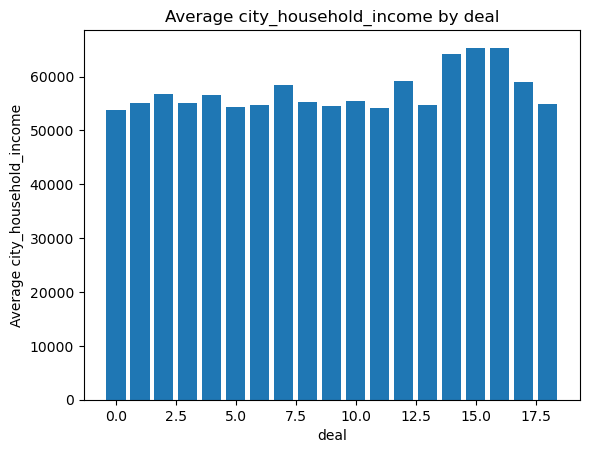

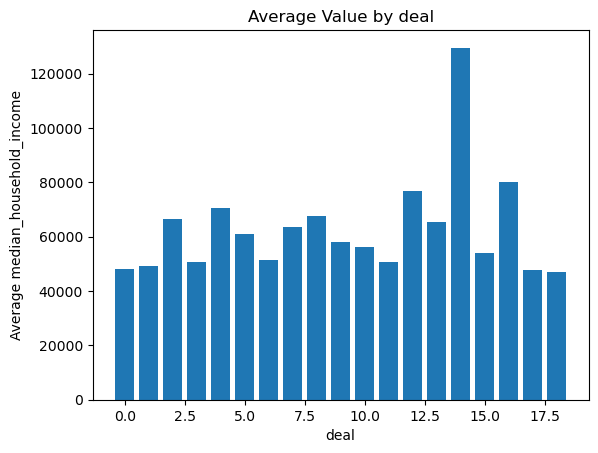

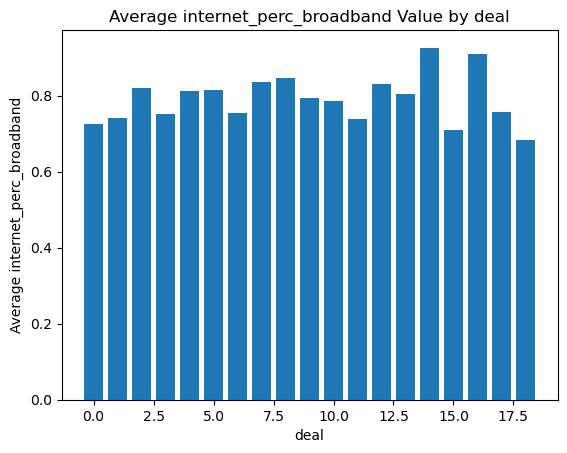

In [212]:
import matplotlib.pyplot as plt
result1 = df_new.groupby('deal')['city_household_income'].mean().reset_index()
result2 = df_new.groupby('deal')['median_household_income'].mean().reset_index()
result3 = df_new.groupby('deal')['internet_perc_broadband'].mean().reset_index()

plt.bar(result1['deal'], result1['city_household_income'])
plt.xlabel('deal')
plt.ylabel('Average city_household_income')
plt.title('Average city_household_income by deal')
plt.show()

plt.bar(result2['deal'], result2['median_household_income'])
plt.xlabel('deal')
plt.ylabel('Average median_household_income')
plt.title('Average Value by deal')
plt.show()

plt.bar(result3['deal'], result3['internet_perc_broadband'])
plt.xlabel('deal')
plt.ylabel('Average internet_perc_broadband')
plt.title('Average internet_perc_broadband Value by deal')
plt.show()


In [213]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_categorical_heatmap(data, x_col, y_col):
    """
    Plot a heatmap expressing the frequency of two categorical variables.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        x_col (str): The column name for the first categorical variable.
        y_col (str): The column name for the second categorical variable.

    Returns:
        None (displays the heatmap)
    """
    # Pivot the data to get frequencies
    pivot_table = pd.pivot_table(data, index=y_col, columns=x_col, aggfunc=len, fill_value=0)

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
    plt.title('Frequency Heatmap of {} vs {}'.format(x_col, y_col))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# Example usage:
# Assuming 'data' is your DataFrame containing the categorical variables
# and 'column1' and 'column2' are the names of the columns you want to plot.
# plot_categorical_heatmap(data, 'column1', 'column2')



In [214]:
temp = 'technology'

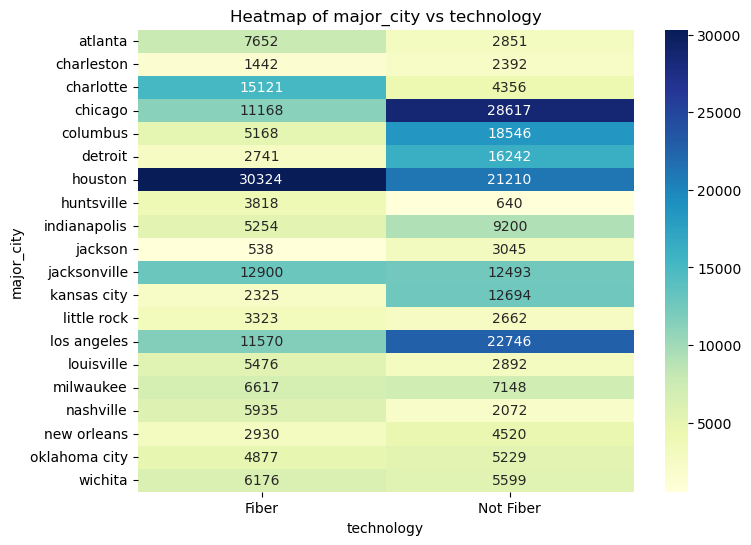

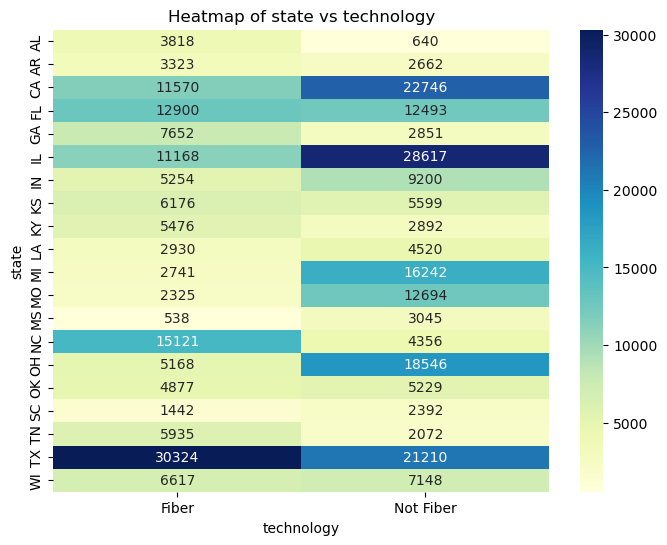

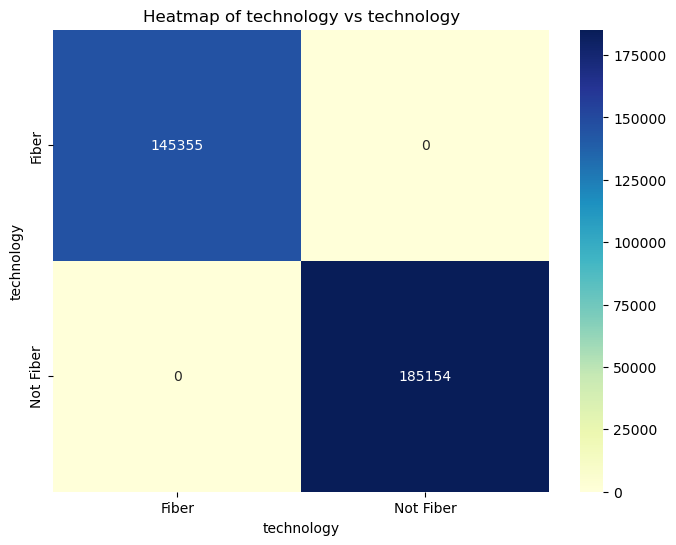

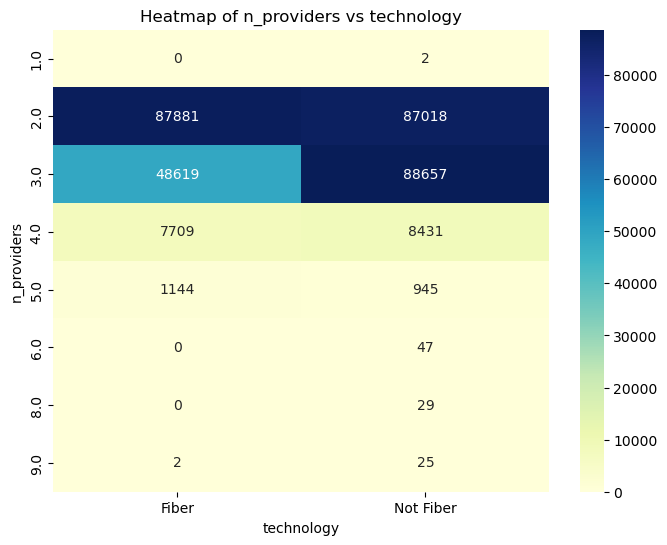

In [215]:
plot_heatmap(df_new,'major_city',temp)
plot_heatmap(df_new,'state',temp)
plot_heatmap(df_new,'technology',temp)
plot_heatmap(df_new,'n_providers',temp)

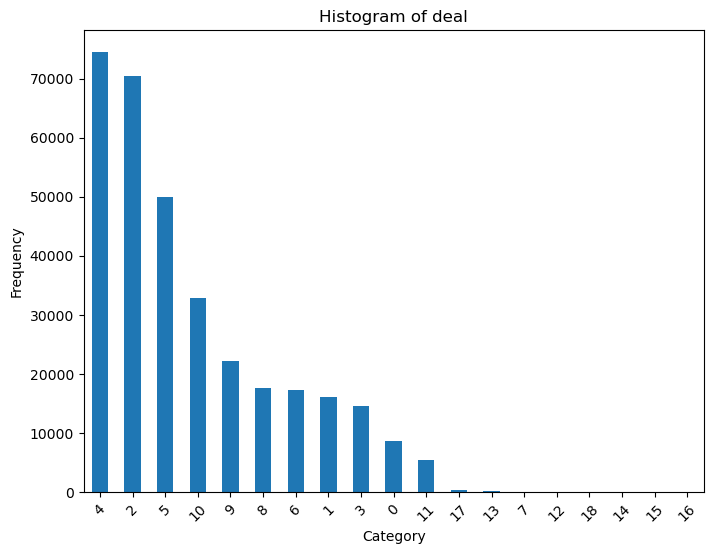

In [216]:
display_histogram(df_new,'deal')

In [217]:
df_new.to_csv('cleaned.csv')